In [2]:
from sympy import *

In [3]:
init_printing()

# Постановка задачи

Дано: На пружине жесткостью k закреплен груз массой M. От положения равновесия груз отвели на расстояние L и отпустили. Трением в системе пренебречь.

Найти: Уравнение движения груза x(t)

Вычислить: х через 1 секунду от начала колебаний, для пружины жесткостью k = 5 Н/м и груза массой 1 кг, если первоначальное отклонение L = 0.1 м.

<img src="http://acm.mipt.ru/twiki/pub/Cintro/SymPy2/spring_horizontal.png" />

# Физическая теория

Считаем $x=0$ положение, где пружина находится в положении равновесия (не растянута и не сжата).

На груз действует сила упругости $F = -kx$

По второму закону Ньютона $ma = F = -kx$

Ускорение $a$ - это вторая производная по времени от $x(t)$, т.е.

$mx'' = -kx$
$$x'' + (k/m)*x = 0$$
Заменим отношение $k/m$ на $w^2$. (Это даст требование, что $w$ - не отрицательное).
$$x'' + w^2 x = 0$$


In [4]:
t, omega = symbols("t, omega", positive=True)

In [5]:
x = Function("x")

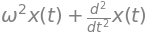

In [6]:
ode = x(t).diff(t, 2) + omega**2 * x(t)
ode

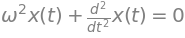

In [8]:
eq = Eq(ode, 0)
eq

In [9]:
ode_sol = dsolve(eq)
ode_sol

Вспоминаем начальные условия: сначала t=0 груз отвели на x=L и отпустили v=0.

In [10]:
L = symbols("L")

In [11]:
x = ode_sol.rhs
x

В начальный момент времени $t=0$ координата груза $L$. 

Подставим  $t=0$ в функцию $x(t)$ и приравняем результат к $L$

In [13]:
T1 = x.subs({t:0})
T1
eq1 = Eq(T1, L)
eq1

В начальный момент времени груз не движется, то есть его скорость 0. Найдем функцию скорости $x'(t)$ в момент $t=0$ и приравняем ее к 0.

In [14]:
T2 = x.diff(t)
T2

In [15]:
T2 = T2.subs({t:0})
T2

In [16]:
eq2 = Eq(T2, 0)
eq2

Решаем систему уравнений eq1 и eq2 относительно C1, C2

In [17]:
C_sol = solve([eq1,eq2])
C_sol

Подставим в решение ode_sol 

In [18]:
res = ode_sol.subs(C_sol[0])                 # подставим эту подстановку в полученное решение ОДУ
res

Вспомним, что мы определяли $k/m$ как $\omega ^2$

In [19]:
m, k = symbols("m k", float=True, positive=True)

In [20]:
w0 = solve(Eq(omega**2, k/m), omega)
w0

In [21]:
res0 = res.subs({omega:w0[0]})
res0

Мы получили уравнение движения x(t).
Найдем значение x через 1 секунду при заданных в задаче значениях.

In [22]:
x = res0.subs({L:0.1, k:5, m:1})    # ответ в виде численной формулы (при любом t)
x

In [23]:
x.subs({t:1})                       # ответ в виде численной формулы (при t=1)

In [24]:
x.subs({t:1}).n()                       # ответ в виде ЧИСЛА (при t=1)

Построим график функции x(t). У нас он хранится в переменной x

In [25]:
from sympy.plotting import plot     # чтобы работало в notebook, если хотим отдельным окном, %matplotlib qt

%matplotlib inline   

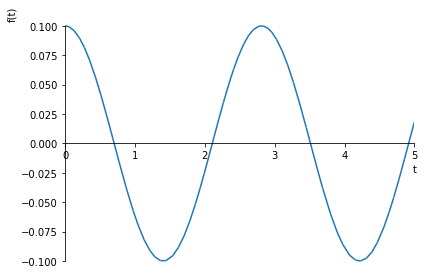

In [26]:
plot(x.rhs, (t, 0, 5))